In [821]:
# Author | Sumit Rana

# importing libraries
import sklearn
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
import seaborn

import matplotlib.pyplot as plt

## Step 1 : Eye-Balling and Understanding Data

In [822]:
data = pd.read_csv("./day.csv")

In [823]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [824]:
data.shape

(730, 16)

In [825]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [826]:
# Distribution of dataset , numeric variables
data.describe(percentiles=[0.20,0.35,0.50,0.75,0.90])

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
20%,146.800000,1.000000,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,12.942322,15.554880,49.975000,8.388467,245.800000,2208.600000,2653.800000
35%,256.150000,2.000000,0.000000,5.000000,0.000000,2.000000,1.000000,1.000000,16.268470,19.642785,56.833300,10.250179,472.450000,3130.300000,3821.500000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
90%,657.100000,4.000000,1.000000,11.000000,0.000000,6.000000,1.000000,2.000000,29.998347,33.908210,81.762500,19.833997,1872.000000,5895.400000,7293.800000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


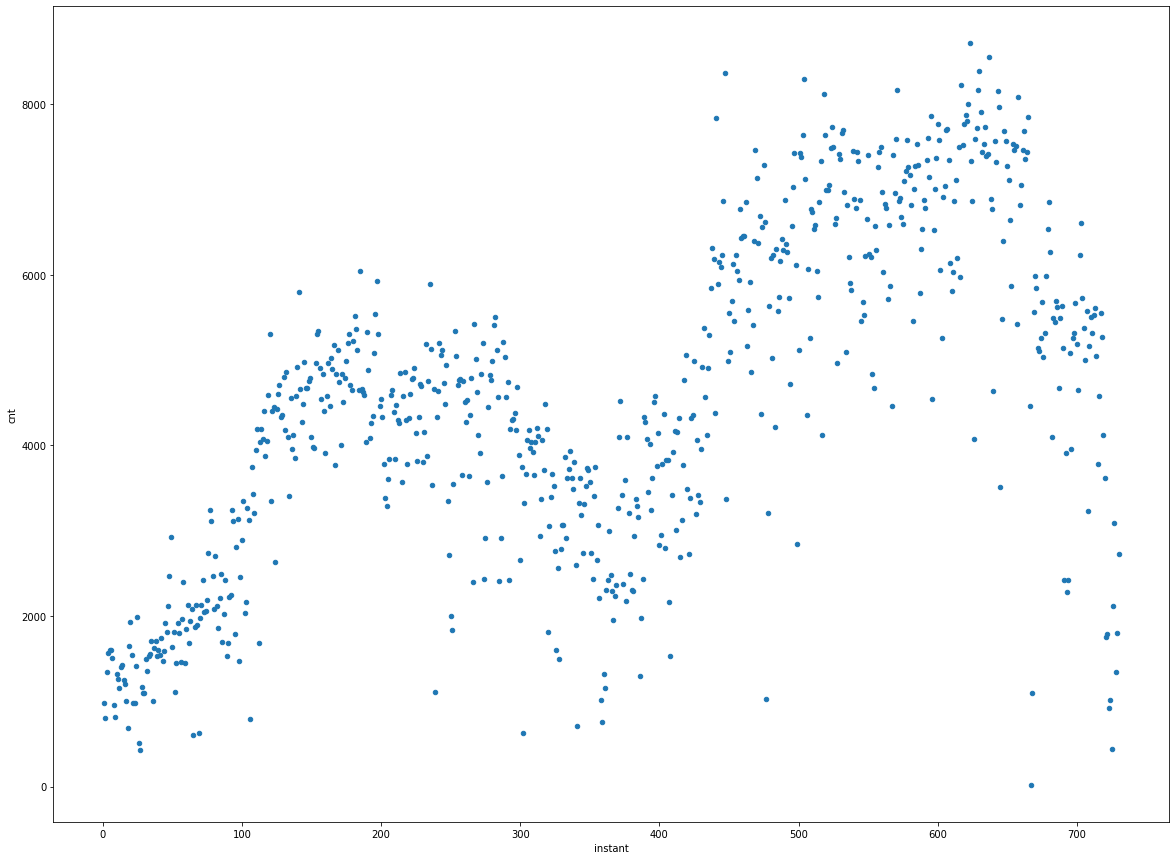

In [827]:
data.plot.scatter(x='instant',y='cnt',figsize=(20,15))

In [828]:
# Utility functions

def create_heatmap(matrix,size = (20,15)):
    fig,ax = plt.subplots(figsize=size)
    seaborn.heatmap(matrix, ax=ax,annot=True,cmap="Greens")
    return 200

200

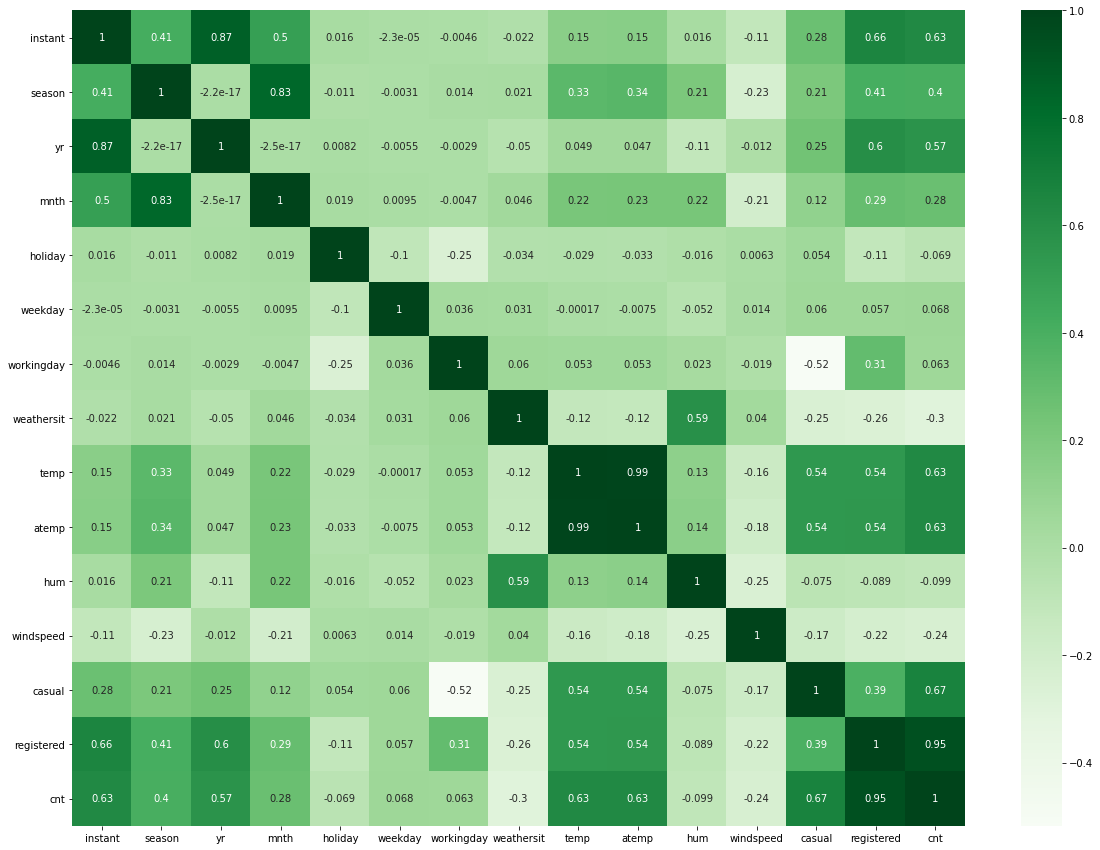

In [829]:
# Correlation between variables

create_heatmap(data.corr())

In [830]:
data.index

RangeIndex(start=0, stop=730, step=1)

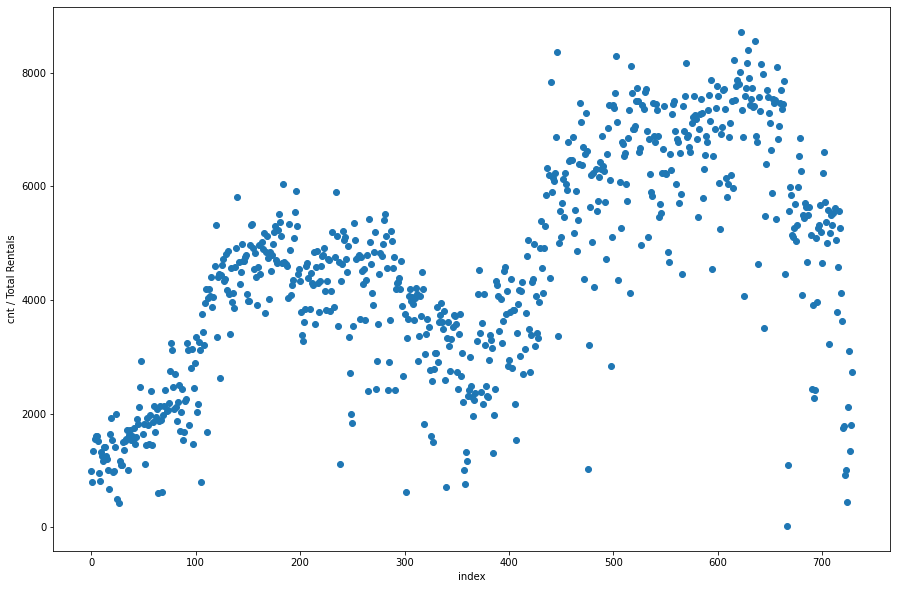

In [831]:
# plotting independent variables

fig,ax = plt.subplots(figsize=(15,10))
plt.scatter(x=data.index,y=data.cnt)
plt.xlabel("index")
plt.ylabel("cnt / Total Rentals")
plt.show()

## Step 2: Cleaning and Standardizing data

In [832]:
data['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [833]:
data['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [834]:
# Some columns are categorical values
# mapping categorical numeric value to string 

# first mapping categorical variables to string for proper vocablary
# to create a readable dataset

data[['weathersit']] = data[['weathersit']].apply(lambda x: x.map({1: 'Clear',
                                            2: 'Mist and Cloudy',
                                            3: 'Light Rain',
                                            4: 'Heavy Rain'
                                           }))

data[['season']] = data[['season']].apply(lambda x:x.map({
                                            1: 'spring',
                                            2: 'summer',
                                            3: 'fall',
                                            4: 'winter'
                                        }))

In [835]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,Mist and Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,Mist and Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [836]:
# Encoding 'season'
season_ohe = OneHotEncoder()
encoding = season_ohe.fit_transform(data[['season']])

temp = pd.DataFrame(encoding.toarray(), columns=season_ohe.categories_)

# dropping a column
temp = temp.drop('winter',axis=1)

# concatinating to main dataset
data = pd.concat([data,temp],axis=1)


In [837]:
# Encoding 'weathersit'
weathersit_ohe = OneHotEncoder()
encoding = weathersit_ohe.fit_transform(data[['weathersit']])
temp = pd.DataFrame(encoding.toarray(), columns=weathersit_ohe.categories_)

# dropping a column
temp = temp.drop('Clear',axis=1)

# concatinating to main dataset
data = pd.concat([data,temp],axis=1)


In [838]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,hum,windspeed,casual,registered,cnt,"(fall,)","(spring,)","(summer,)","(Light Rain,)","(Mist and Cloudy,)"
0,1,01-01-2018,spring,0,1,0,6,0,Mist and Cloudy,14.110847,...,80.5833,10.749882,331,654,985,0.0,1.0,0.0,0.0,1.0
1,2,02-01-2018,spring,0,1,0,0,0,Mist and Cloudy,14.902598,...,69.6087,16.652113,131,670,801,0.0,1.0,0.0,0.0,1.0
2,3,03-01-2018,spring,0,1,0,1,1,Clear,8.050924,...,43.7273,16.636703,120,1229,1349,0.0,1.0,0.0,0.0,0.0
3,4,04-01-2018,spring,0,1,0,2,1,Clear,8.200000,...,59.0435,10.739832,108,1454,1562,0.0,1.0,0.0,0.0,0.0
4,5,05-01-2018,spring,0,1,0,3,1,Clear,9.305237,...,43.6957,12.522300,82,1518,1600,0.0,1.0,0.0,0.0,0.0


200

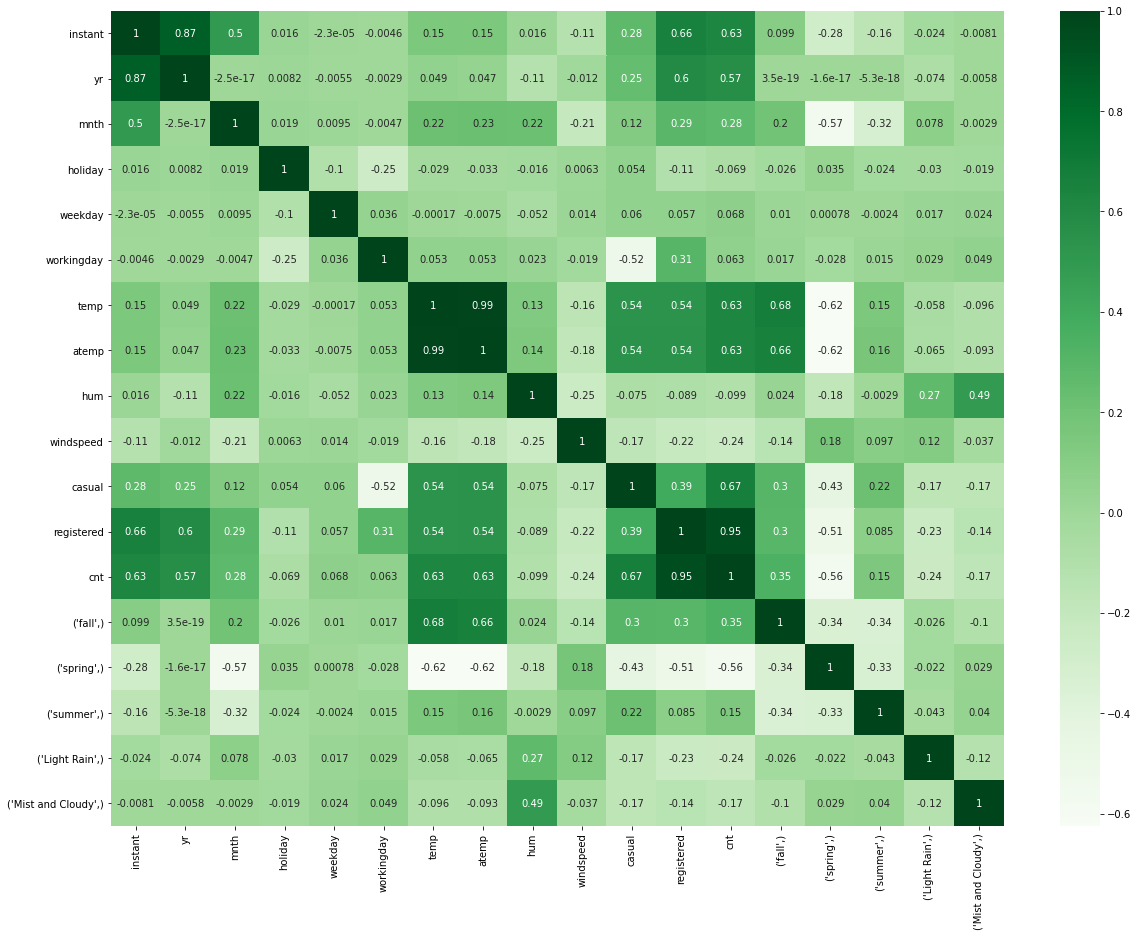

In [839]:
# Correlation on dataset
create_heatmap(data.corr(),size=(20,15))

## Step 3: Preparing data for modelling

### Removing Variables
    -'instant' is essentially the index for records , so can be removed
    -'dteday' is not required, as we are considering months , weeks and years as derived metrices, so can be removed , as we are using other derived variables so the column can be dropped to remove multicollinearity.
    
    - 'season' and 'weathersit' are categorical values and are encoded via one-hot encoding , so original columns can be dropped
     - 'casual' and 'registered' are a subset of the target variables, so are actually dependent so cannot be used in the model else will overfit the model.
    
    

In [840]:
# Removing non-numeric , unwanted variables for modelling

# unwanted_columns = ['instant','dteday','season','weathersit','casual','registered','atemp']
unwanted_columns = ['instant','dteday','season','weathersit','casual','registered']
data = data.drop(unwanted_columns,axis=1)

In [841]:
# Calculating VIF value of independent variables

def calculate_vif():
    columns = list(data.columns)
    columns.remove('cnt')

    independent_columns = columns
    print(independent_columns)

    independent_variable_df = data[independent_columns]

    # VIF dataframe
    vif_data = pd.DataFrame()
    vif_data["feature"] = independent_variable_df.columns

    # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(independent_variable_df.values, i)
                              for i in range(len(independent_variable_df.columns))]
    
    return vif_data

In [842]:
vif_data = calculate_vif()
vif_data

['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', ('fall',), ('spring',), ('summer',), ('Light Rain',), ('Mist and Cloudy',)]


,feature,VIF
0,yr,2.019926
1,mnth,11.610190
2,holiday,1.113960
3,weekday,3.189837
4,workingday,3.320156
5,temp,575.883055
6,atemp,603.109453
7,hum,28.635246
8,windspeed,6.870077
9,"(fall,)",4.861166


## Removing more columns
    - 'atemp' and 'temp' are independent variables but have high correlation of 0.99 , so any one variable can be dropped. These variables shows symptoms of multicollinearity.

In [843]:
# Removing non-numeric , unwanted variables for modelling

unwanted_columns = ['atemp']
data = data.drop(unwanted_columns,axis=1)

vif_data = calculate_vif()
vif_data

['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'hum', 'windspeed', ('fall',), ('spring',), ('summer',), ('Light Rain',), ('Mist and Cloudy',)]


,feature,VIF
0,yr,2.019108
1,mnth,11.438282
2,holiday,1.112770
3,weekday,3.189548
4,workingday,3.318483
5,temp,25.865103
6,hum,27.354091
7,windspeed,6.811575
8,"(fall,)",4.783421
9,"(spring,)",4.068796


### Comments
* Recursive Feature Elimination can also be applied on the dataset, but it is not required as we have already eliminated columns showing multicollinearity symptoms.

200

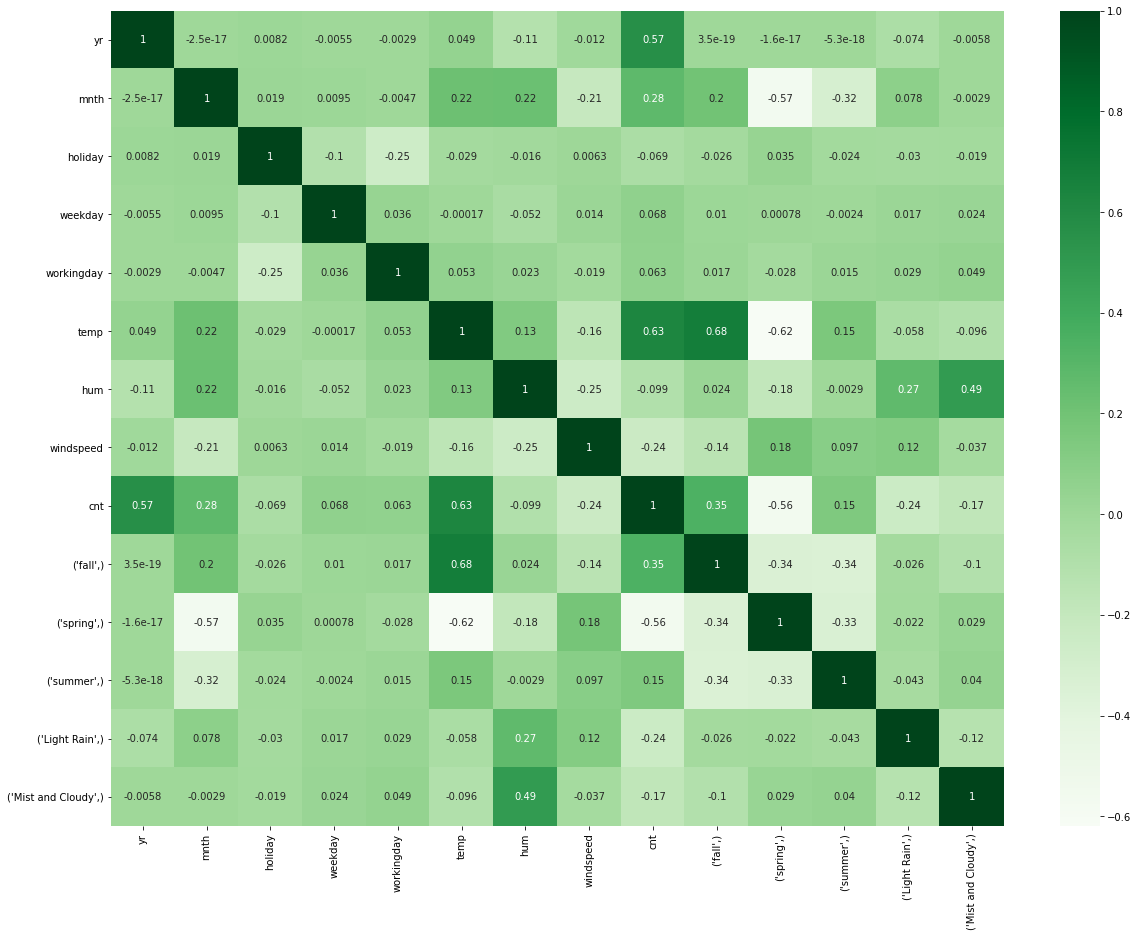

In [844]:
# correlation after dropping variables

create_heatmap(data.corr(),size=(20,15))

In [845]:
# data after dropping insignificant columns

data.head()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,"(fall,)","(spring,)","(summer,)","(Light Rain,)","(Mist and Cloudy,)"
0,0,1,0,6,0,14.110847,80.5833,10.749882,985,0.0,1.0,0.0,0.0,1.0
1,0,1,0,0,0,14.902598,69.6087,16.652113,801,0.0,1.0,0.0,0.0,1.0
2,0,1,0,1,1,8.050924,43.7273,16.636703,1349,0.0,1.0,0.0,0.0,0.0
3,0,1,0,2,1,8.200000,59.0435,10.739832,1562,0.0,1.0,0.0,0.0,0.0
4,0,1,0,3,1,9.305237,43.6957,12.522300,1600,0.0,1.0,0.0,0.0,0.0


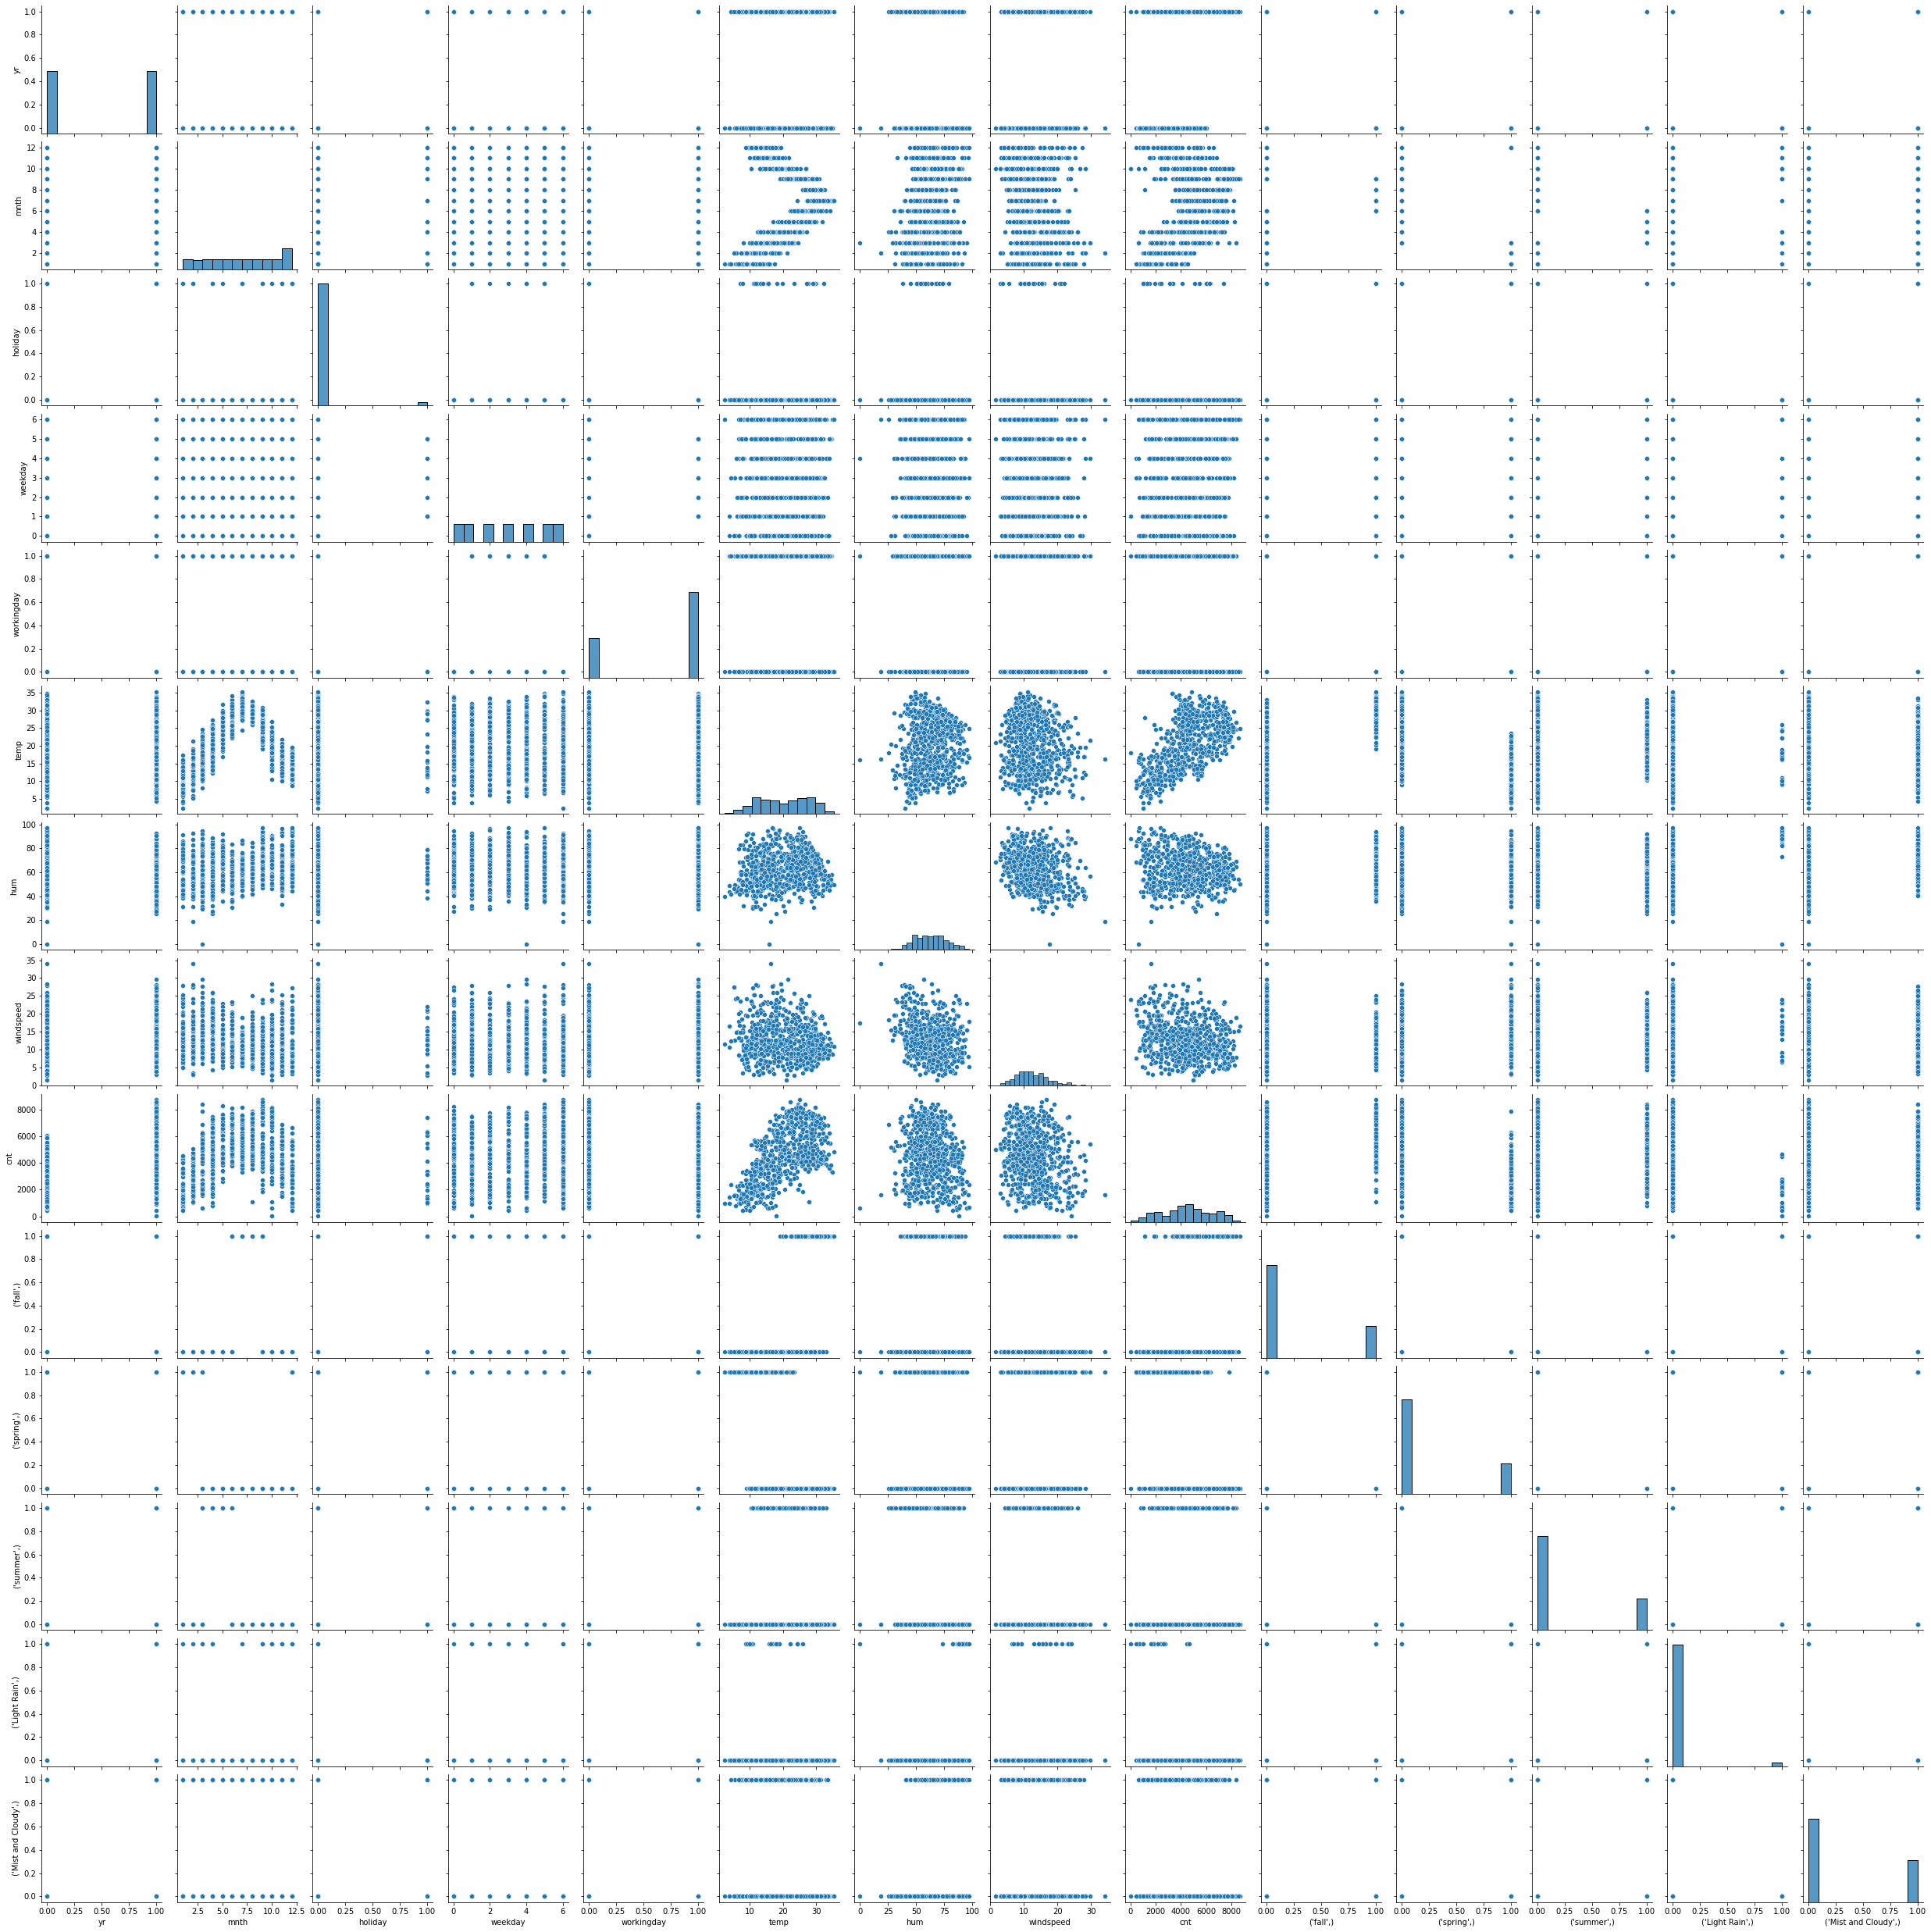

In [846]:
# plots to visualize correlation
# with large number of independent variables this visualization is not very effective and helpful

seaborn.pairplot(data)

### Preparing dataset for training and testing

In [847]:
columns = list(data.columns)

# Predictor variables
Y = data['cnt']

# Target Variable
columns.remove('cnt')
X = data[columns]

print("Predictor Variables :{}".format(columns))
train_data, test_data= train_test_split(data,train_size=0.75,random_state=100)

# creating train and test sets
train_x = train_data[columns]
train_y = train_data['cnt']

test_x = test_data[columns]
test_y = test_data['cnt']

Predictor Variables :['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'hum', 'windspeed', ('fall',), ('spring',), ('summer',), ('Light Rain',), ('Mist and Cloudy',)]


In [848]:
print("Training data shape: {}, Testing data shape: {}".format(train_x.shape,test_x.shape))

Training data shape: (547, 13), Testing data shape: (183, 13)


In [849]:
train_x.shape, train_y.shape,test_x.shape, test_y.shape

((547, 13), (547,), (183, 13), (183,))

## Step 4: Creating Model

In [850]:
model = LinearRegression()

In [851]:
train_x

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,"(fall,)","(spring,)","(summer,)","(Light Rain,)","(Mist and Cloudy,)"
311,0,11,0,2,1,16.741653,72.1667,4.625513,0.0,0.0,0.0,0.0,0.0
523,1,6,0,5,1,26.615847,46.7917,11.750661,0.0,0.0,1.0,0.0,0.0
381,1,1,0,2,1,15.294763,71.6087,23.391710,0.0,1.0,0.0,0.0,1.0
413,1,2,0,6,0,14.213347,53.4583,12.792243,0.0,1.0,0.0,0.0,0.0
253,0,9,0,0,0,26.786653,71.3750,7.708618,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,8,0,4,1,30.852500,65.9583,8.666718,1.0,0.0,0.0,0.0,0.0
53,0,2,0,3,1,9.091299,42.3043,6.305571,0.0,1.0,0.0,0.0,0.0
350,0,12,0,6,0,10.591653,56.0833,16.292189,0.0,0.0,0.0,0.0,1.0
79,0,3,0,1,1,17.647835,73.7391,19.348461,0.0,0.0,1.0,0.0,1.0


In [852]:
test_y[:5]

184    6043
535    6211
299    2659
221    4780
152    4968
Name: cnt, dtype: int64

In [853]:
# fitting model
model.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [854]:
# model coefficients
model.coef_

array([ 1.99976730e+03, -1.62450794e+00, -7.12660165e+02,  7.18795918e+01,
        1.66713220e+02,  1.32155355e+02, -1.13775730e+01, -4.88221460e+01,
       -8.28732828e+02, -1.49927069e+03, -4.43994088e+02, -2.17734018e+03,
       -4.88311053e+02])

In [855]:
model.intercept_

2786.023662048443

### Evaluating training dataset

In [856]:
# inferencing model on training dataset

train_ypredicted = model.predict(train_x)

In [857]:
# Residual Analysis on training data

training_residuals = train_y-train_ypredicted

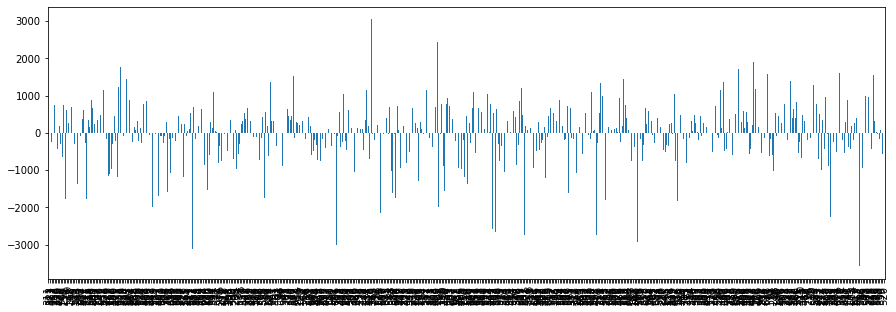

In [858]:
training_residuals.plot.bar(figsize=(15,5))

/home/sam/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


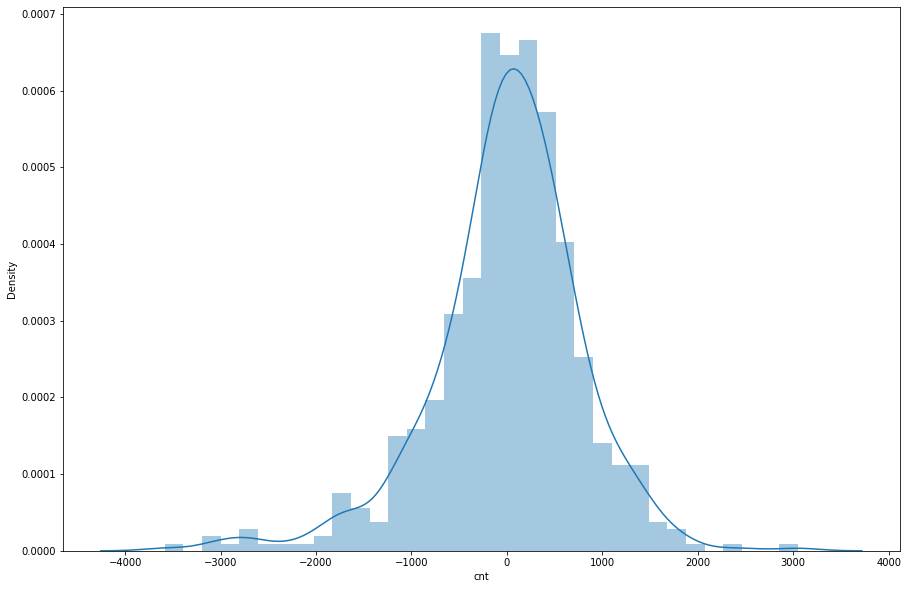

In [859]:
fig,ax =  plt.subplots(figsize=(15,10))
seaborn.distplot(training_residuals,ax=ax)

In [860]:
# r2_score on training data

accuracy = r2_score(train_y,train_ypredicted)
print("Training Accuracy : {}%".format(round(accuracy*100,3)))

Training Accuracy : 83.738%


In [861]:
rmse = mean_squared_error(y_true=train_y,y_pred=train_ypredicted,squared=False)
rmse

787.9606421993966

## Step 5: Model Evaluation 

In [862]:
# Making predictions on test set on model
test_ypredicted = model.predict(test_x)

In [863]:
# Residual Analysis on training data

testing_residuals = test_y-test_ypredicted

In [ ]:
testing_residuals.plot.bar(figsize=(15,5))

In [ ]:
fig,ax =  plt.subplots(figsize=(15,10))
seaborn.distplot(testing_residuals,ax=ax)

In [ ]:
test_y[115:120], test_ypredicted[115:120]

In [ ]:
# plotting Regression line with model

fig,ax = plt.subplots(figsize=(15,10))
plt.scatter(x=test_x.index,y=test_y, label="Actual Bike rentals")
plt.xlabel("index")
plt.ylabel("Bike Rentals")

plt.scatter(x=test_x.index,y=test_ypredicted, label="Predicted Bike rentals")
plt.legend()
plt.show()


In [ ]:
# r2_score on training data

accuracy = r2_score(test_y,test_ypredicted)
print("Testing Accuracy : {}%".format(round(accuracy*100,3)))

In [ ]:
rmse = mean_squared_error(y_true=test_y,y_pred=test_ypredicted,squared=False)
rmse

### Comments:
    - random_state as 42 in splitting training and test data , gave a little over fit data
    - using random_state as 100 in splitting dataset gave more generalised model
    -'hum' and 'month' can also be removed cause of high VIF value , but removing them didn't impacted the model accuracy and they show high correlation with the target variable.

In [ ]:
# R2 Score
y_test = test_y
y_pred = test_ypredicted


from sklearn.metrics import r2_score
r2_score(y_test, y_pred)